# 🗺️ EasyMap

Cartopy is a great map-making tool. It does require a lot of boiler plate code. I wrote EasyMap to make it easy to make simple basemaps. You'll see me using it throughout Herbie, and I hope it can be useful to you.

When I first learned Cartopy, it was difficult to know how to add things to a map. Now that I am more experienced, I know what I like to put on my maps to build the base layer. Instead of re-coding all these little tasks of adding different features, I simplified and put all these feature layers into functions in my EasyMap class. Now I can create a cartopy axes and add different features to it, or add features to an existing cartopy axes.

This notebook is not meant to replace an other Cartopy tutorials, so if you are unfamiliar with Cartopy, I suggest you first refer to the [Cartopy Docs](https://scitools.org.uk/cartopy/docs/latest/) and [Project Pythia Cartopy tutorial](https://foundations.projectpythia.org/core/cartopy/cartopy.html).

Ok, let's get started. Lets import Herbie so we can download some NWP data, and we will import `EasyMap`, `pc` (which is an alias for `cartopy.crs.PlateCarree()`) and `ccrs`, which is `cartopy.crs`

In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc, ccrs

import matplotlib.pyplot as plt

cartopy.mpl.geoaxes.GeoAxes

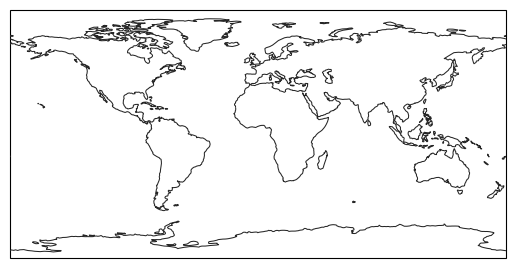

In [12]:
# Make a default basemap
ax = EasyMap().ax
type(ax)

The `ax` returned is a `cartopy.mpl.geoaxes.GeoAxes` that you can plot data on. Often you want to change the projection or add features. Just tell EasyMap what you want...

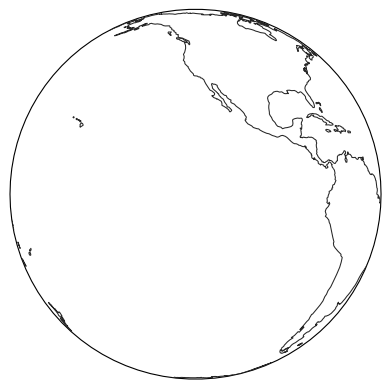

In [3]:
# Give your basemap a different projection
ax = EasyMap(crs=ccrs.Geostationary(central_longitude=-120)).ax

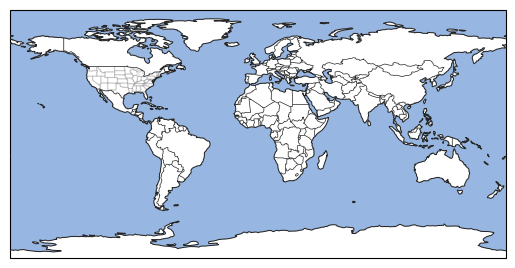

In [4]:
# Add features
ax = EasyMap().STATES().BORDERS().OCEAN().ax

/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.12/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


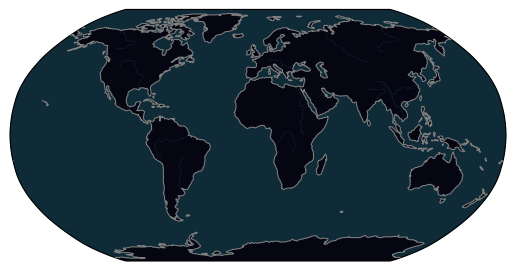

In [5]:
# Dark theme
ax = EasyMap(crs=ccrs.Robinson(), theme="dark").LAND().OCEAN().RIVERS().ax

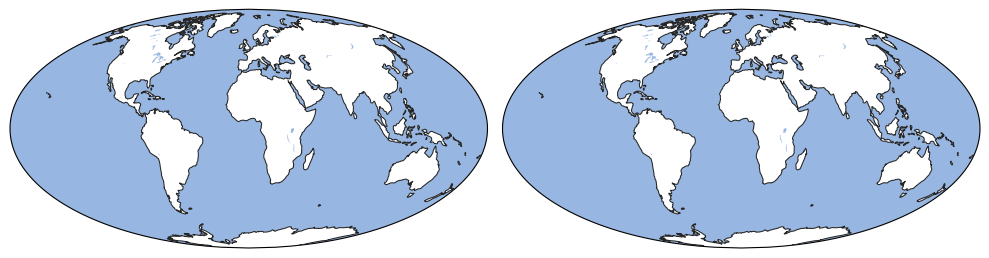

In [6]:
# Subplots with same projection
fig, (ax1, ax2) = plt.subplots(
    1, 2, subplot_kw=dict(projection=ccrs.Mollweide()), figsize=[10, 5]
)
for ax in (ax1, ax2):
    EasyMap(ax=ax).OCEAN().LAKES()

plt.tight_layout()

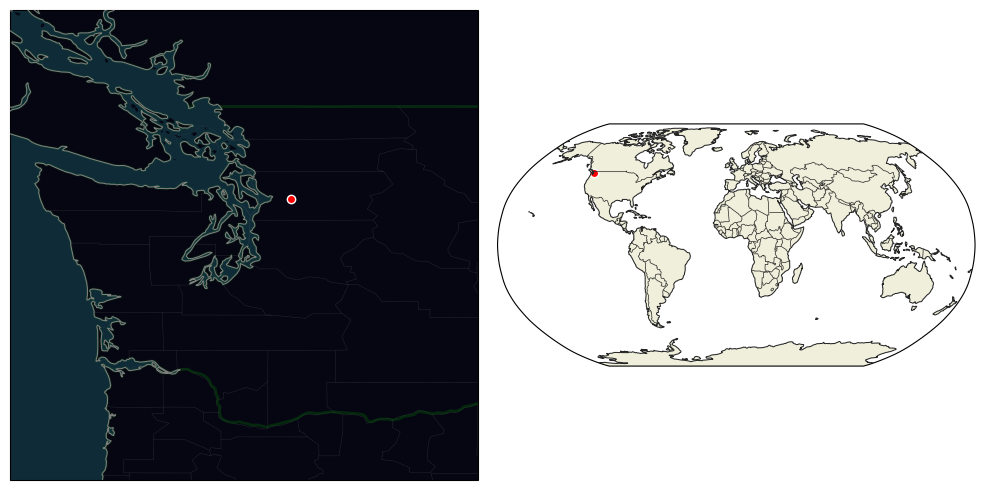

In [7]:
# Subplots with different projections
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_axes(121, projection=pc)
ax2 = fig.add_axes(122, projection=ccrs.Robinson())
EasyMap("10m", ax=ax1, theme="dark").OCEAN().COUNTIES().STATES(
    linewidth=2, edgecolor="g"
)
EasyMap(ax=ax2).LAND().BORDERS()

# Plot a point
ax1.scatter(-122, 48, color="red", edgecolors="w", transform=pc)
ax2.scatter(-122, 48, color="red", edgecolors="w", transform=pc)

ax1.set_extent([-125, -120, 45, 50])
ax2.set_global()

plt.tight_layout()

## EasyMap with Herbie data

Now let's download some HRRR data and make a map of composite reflectivity.


In [8]:
ds = Herbie("2022-12-10 12:00").xarray("REFC:entire")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Dec-10 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


The standard xarray plot looks a bit boring...


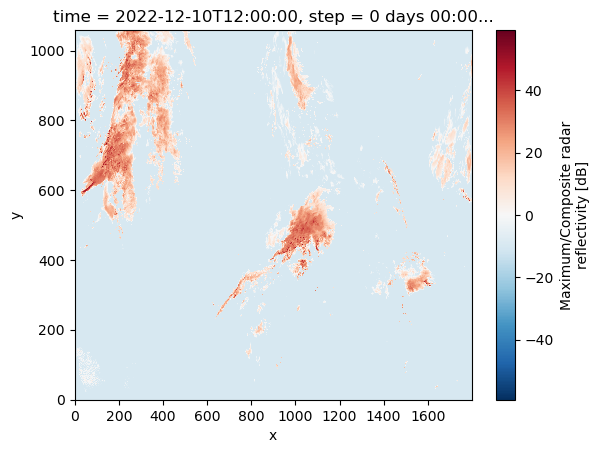

In [9]:
ds.refc.plot()

Fun fact: this reflectivity field uses `-10` as the missing value. Lets just replace any negative number with nan. (Can anyone tell me why there are reflectivities less than zero?)


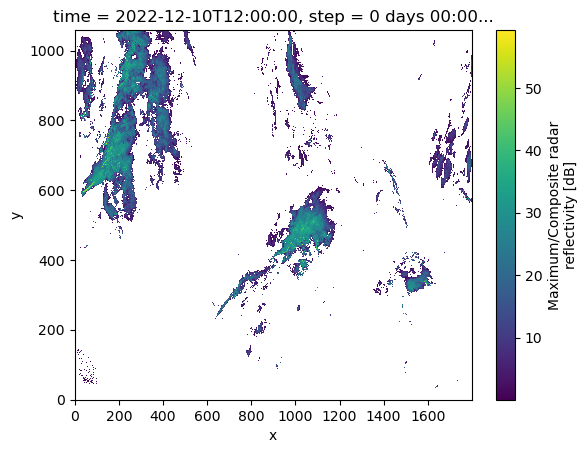

In [10]:
ds["refc"] = ds.refc.where(ds.refc > 0)
ds.refc.plot()

Applying the mask sure makes the reflectivity data look better.

Ok, but we really want to see this data on a map. Let's use the Cartopy Workshop `EasyMap()`. Herbie comes with an xarray accessor to parse the Cartopy coordinate reference system.


Notice that it gives us a Platte Carree map of the world. We can use this to plot our HRRR data onto


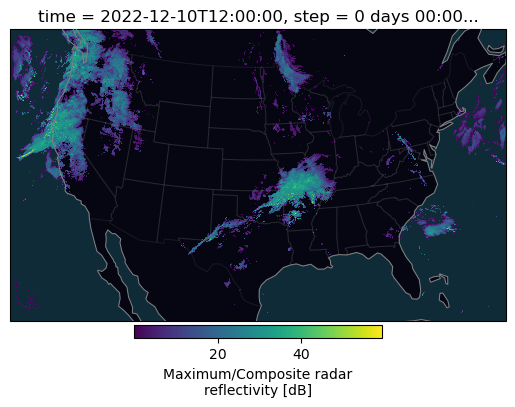

In [11]:
ax = EasyMap(crs=ds.herbie.crs, theme="dark").OCEAN().STATES().ax
ds.refc.plot(
    x="longitude",
    y="latitude",
    ax=ax,
    transform=pc,
    cbar_kwargs={"shrink": 0.5, "orientation": "horizontal", "pad": 0.01},
)